# Kinetic Features

Created: 08/25/2022

Author: Andrew Weng

In [2]:
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import pybamm

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from src.formation import FormationCell
import src.plotter as plotter

In [7]:
plotter.set_plot_config(plt);

In [33]:
cell = FormationCell(4)
hppc_data_chg = cell.process_diagnostic_hppc_charge_data()[0]
hppc_data_dch = cell.process_diagnostic_hppc_discharge_data()[0]
df_raw = hppc_data_chg['raw_all']

df_chg = hppc_data_chg['data']
df_dch = hppc_data_dch['data']

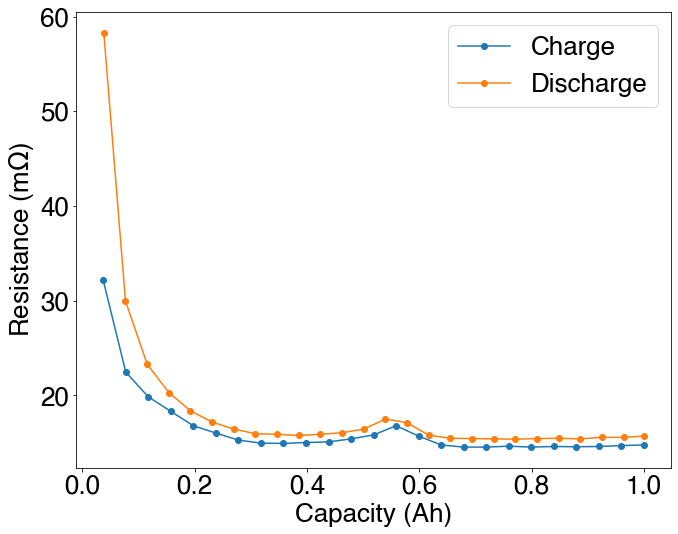

In [46]:
xc = df_chg['capacity']/np.max(df_chg['capacity'])
yc = df_chg['resistance_10s_ohm']*1000
xd = df_dch['capacity']/np.max(df_dch['capacity'])
yd = df_dch['resistance_10s_ohm']*1000

plt.figure()

plt.plot(xc, yc, marker='o', label='Charge')
plt.plot(xd, yd, marker='o', label='Discharge')
plt.legend()
plt.xlabel('Capacity (Ah)')
plt.ylabel(('Resistance (m$\Omega$)'))
plt.grid(False)


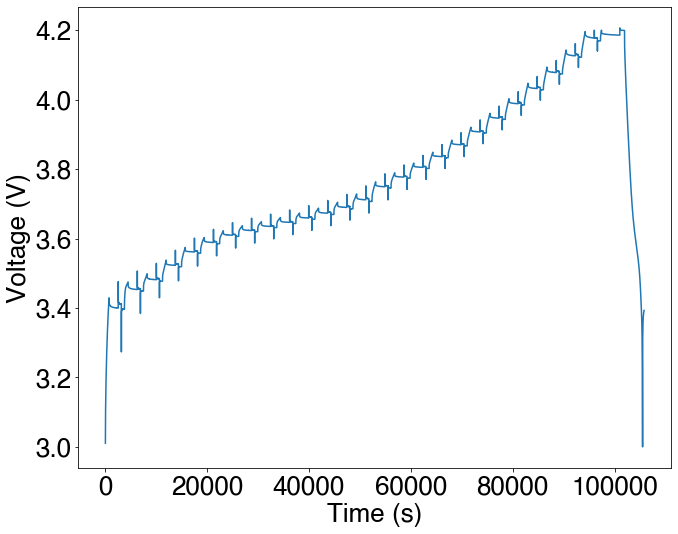

In [48]:
x = df_raw['Test Time (s)'] - df_raw['Test Time (s)'].iloc[0]
y = df_raw['Potential (V)']

plt.figure()
plt.plot(x, y, marker='', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(False)

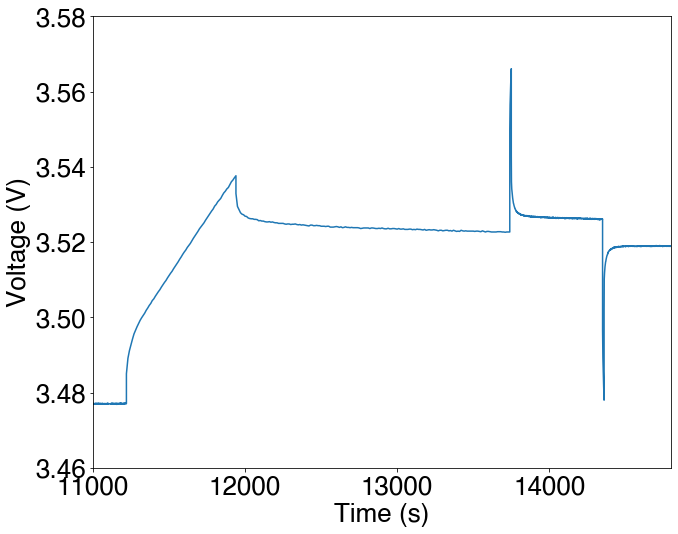

In [55]:
plt.figure()

x = df_raw['Test Time (s)'] - df_raw['Test Time (s)'].iloc[0]
y = df_raw['Potential (V)']

plt.plot(x, y, marker='', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.xlim((11000, 14800))
plt.ylim((3.46, 3.58))
plt.grid(False)

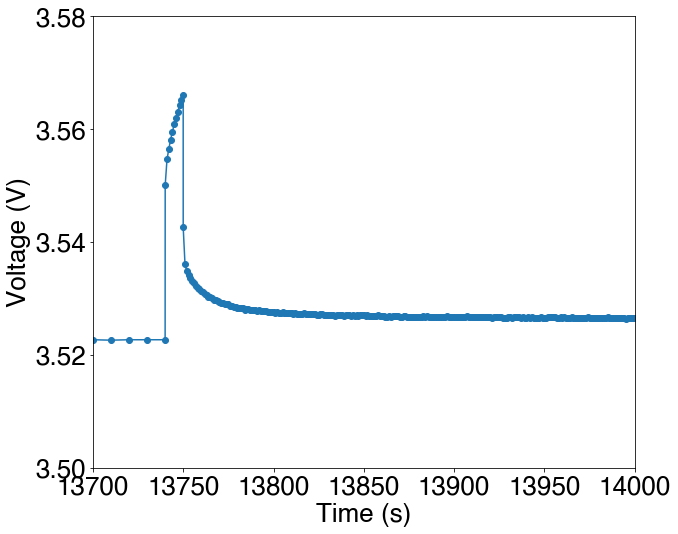

In [62]:
plt.figure()

x = df_raw['Test Time (s)'] - df_raw['Test Time (s)'].iloc[0]
y = df_raw['Potential (V)']

plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.xlim((13700, 14000))
plt.ylim((3.50, 3.58))
plt.grid(False)